# Тестовое задание Devim
### Описание  данных

* Переменные, характеризующие кредитную историю клиента

|признак|описание|
|---|---|
|cred_sum_cc_all|сумма кредитов по кредитным картам|
|mfo_inqs_count_month|количество запросов на кредиты в другие в МФО|
|all_closed_creds_sum_all|количество закрытых кредитов|
|bank_inqs_count_quarter|количество запросов на кредиты в банки|
|cred_max_overdue_max_ly|максимальная просрочка за год|
|all_active_creds_sum_all|денежная сумма всех активных кредитов|
|mfo_last_days_all|Количество дней с последнего займа в МФО|
|cred_sum_cc_ly|Сумма лимитов кредитных карт, оформленных за последний год|
|cred_sum_debt_all_all|Сумма задолженности по всем кредитам|
|all_closed_creds_sum_ly|Сумма закрытых кредитов за последний год|
|mfo_cred_mean_sum_3lm |Средняя сумма МФО кредитов, выданных за последние 3
месяца|
|delay_more_sum_all|Количество просрочек более чем на 90 дней по всем кредитам|
|all_creds_count_all|Общее количество кредитов|
|cred_day_overdue_all_sum_all|Суммарное количество дней просрочки текущих
активных кредитов|
|cred_max_overdue_max_3lm|Максимальная сумма просроченной задолженности, по
кредитам взятым за последние 3 месяца|
|mfo_closed_count_ly|Количество закрытых МФО кредитов, взятых за последний год|
|cred_sum_overdue_cc_all|Сумма просрочек по кредитным картам|
|count_overdue_all_3lm|Количество кредитов на просрочке, взятых за последние 3
месяца|
|all_creds_count_lm|Количество кредитов, взятых за последний месяц
|region|регион подачи заявки|

* Переменные характеризующие клиента

|признак|описание|
|---|---|
|work_code|Профессия. 5 - рабочие профессии (слесарь, токарь). 3 - офисный
работник (бухгалтер, программист). 1 - госслужащий (полицейский, медсестра)|
|month_income|доход|

* Целевые переменные:
    
|признак|описание|
|---|---|
|bad|1 - кредит просрочен, 0 - кредит возвращен, nan - отказ|   
|approved|1 - одобрено, 0 - отказано|

### Постановка задачи:

Построить две модели классификации на исходных признаках.             
Модель 1 - обученная только на выданных заявках, целевая переменная bad.             
Модель 2 - обученная на всех заявках, целевая переменная approved.             
Для тренировки и валидации использовать файл train.csv             
Сравнить распределения признаков на двух выборках. Первая - только выданные             
заявки (bad != nan). Вторая - все заявки. Выделить признаки, распределения которых             
сильно отличаются. Прокомментировать причину различий в распределении.             
Сравнить модель 1 и модель 2     

### Методика сравнения:
1.1 Строим модель 1 и модель 2.                    
1.2 Считаем моделью 1 вероятность принадлежности к классу bad=1 на всем тестовом
наборе test.csv                 
1.3 Выбираем выданные заявки (bad != nan), группируем заявки в 7 групп по скору.
Считаем badrate в каждом интервале. Badrate - количество плохих (bad=1) кредитов в
бине, поделенное на количество всех кредитов в бине. Строим график stackedbar.
Границы интервалов необходимо подобрать так, чтобы badrate в соседних интервалах
отличался.                                         
2.1. Выбираем невыданные заявки (bad=nan). Разбиваем на интервалы по скору,
полученные в п.1.3                 
2.2. В каждом бине размечаем случайную часть заявок как “плохие” (bad=1).
Количество плохих в бине должно соответствовать badrate, рассчитанному в п.1 для
данного бина.                    
3. Смешиваем заявки, размеченные в п.2.2 с выданными заявками (bad != nan).                  
4. Сортируем полученную выборку по возрастанию вероятности принадлежности к
классу bad=1, рассчитанной в п. 1.2. Выбираем первые 30% заявок и считаем по ним
badrate.                            
5. Считаем моделью 2 вероятность принадлежности к классу approved=0 на всем
тестовом наборе test.csv. Сортируем по возрастанию вероятности.                 
6. Выбираем первые 30% заявок и считаем по ним badrate.                
7. Объяснить почему одна модель получилась лучше другой по целевой метрике.               
Целевая метрика - процент “плохих” среди одобренных заявок.                  
8. Придумать как можно улучшить целевую метрику - процент плохих в 30%
одобренных заявках.                   

### Подсказки:
Комбинировать модель 1 и модель 2;
Сэмплирование выборки;
Применить алгоритм разметки отклоненных заявок.
При выполнении задания рекомендуем сделать упор на анализ данных,
интерпретацию решений и ошибок моделей. Способ улучшения целевой метрики.
Меньше усилий тратить на подбор гиперпараметров и выбор алгоритма.На выполнение задания отводится 1 неделя с момента получения письма
Отчет прислать в файле .pdf

----

## Решение:
### 0. Библиотеки

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore") 
from tqdm import tqdm_notebook
import os, re, sys, gc, pickle, time
from collections import defaultdict
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd
import numpy as np
from itertools import combinations
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from plot_metric.functions import BinaryClassification
import warnings
warnings.filterwarnings("ignore") 
from tqdm import tqdm_notebook
import os, re, sys, gc, pickle, time
from collections import defaultdict

### 0. Функции

In [2]:
def convert_types(df):
    '''конвертирует типы (по возможности)'''
    df_c = df.copy()
    for col in df.columns:
        ser = df[col]
        try:
            ser2 = ser.astype('datetime64')
            df_c[col] = ser2
        except:
            try:
                ser_float =ser.astype(np.float32)
                ser_int =ser.astype(np.int32)
                if (ser_float == ser_int).all():
                    df_c[col] =ser_int
                else:
                    df_c[col] =ser_float
            except:
                try:
                    df_c[col] = ser.str.lower().str.strip()
                except:
                    df_c[col] = ser
    return df_c

def prepare_datasets(df):
    mask_vidannie = df['bad'].notna()
    df_bad = df[mask_vidannie].drop('approved', 1)
    df_approved = df.drop('bad', 1)
    return (df_bad.set_index('order_id'), df_approved.set_index('order_id'))

def do_ks_2samp_test(ser_tr, ser_te, alpha=.05):
    if stats.ks_2samp(ser_tr, ser_te)[1]<alpha:
        dist_trte_res = 'раcпределения разные'
    else:
        dist_trte_res = 'раcпределения одинаковые'
    return dist_trte_res

def make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te, feature, to_bin, bins):
    x_bad_tr, x_bad_te, x_approved_tr, x_approved_te = \
        X_bad_tr[feature], X_bad_te[feature], X_approved_tr[feature], X_approved_te[feature]
    _x_bad_tr, _x_bad_te, _x_approved_tr, _x_approved_te\
        = x_bad_tr.to_frame('bad.train' ), x_bad_te.to_frame('bad.test'  ),\
          x_approved_tr.to_frame('approved.train'  ), x_approved_te.to_frame('approved.test'  )
    __ddf = pd.concat([_x_bad_tr, _x_bad_te, _x_approved_tr, _x_approved_te], 1)
    L= []
    for name, df in zip(('bad.train', 'bad.test', 'approved.train', 'approved.test'),\
                        (x_bad_tr, x_bad_te, x_approved_tr, x_approved_te)):
        if to_bin:
            _bins = pd.cut(df, bins).astype(str)
            _bins.loc[df==0] = 0
            _bins = _bins.replace({'nan':'other'})
            _df = df.to_frame()
            _df['bins'] = _bins
            order = _df.sort_values(feature).drop_duplicates(subset = ['bins'], keep='first')['bins'].values.tolist()

            _bins = _bins.value_counts(normalize=True)
            L.append(_bins.to_frame(name))
        else:
            L.append(df.value_counts(normalize=True).sort_index())
            
    try:
        _df_cred_sum_cc_all = pd.concat(L, 1).round(2).loc[order]
    except:
        _df_cred_sum_cc_all = pd.concat(L, 1).round(2)        
    
    _df_cred_sum_cc_all.index.name=f'{feature}.share'
    
    fig = plt.figure(figsize = (17,5))
    plt.suptitle(f'{feature}',fontsize = 30)
    ax1 = plt.subplot(1, 3, 1)
    _df_cred_sum_cc_all.T.plot(kind ='barh', stacked = True, ax =ax1)
    ax1.set_title('distribution#1',fontsize = 20)


    ax2=plt.subplot(1, 3, 2)
    _df_cred_sum_cc_all.apply(lambda x: x/_df_cred_sum_cc_all.sum(1)).plot(kind ='barh', stacked = True, ax= ax2)
    ax2.set_title('distribution#2',fontsize = 20)

    ax3=plt.subplot(1,3, 3)
    for col in __ddf.columns:
        sns.kdeplot(np.log1p(__ddf[col]), ax =ax3)
    ax3.legend(['bad.train', 'bad.test', 'approved.train', 'approved.test'])
    ax3.set_title('distribution#3',fontsize = 20)
    ax3.set_xlabel('values(log)')
    ax3.set_xlabel('kde')
    
    
    plt.subplots_adjust(hspace = .5) 
    plt.tight_layout()
    fig.savefig(f'kde_{feature}.png')

### 1. Загрузка данных

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_bad_tr, df_approved_tr = prepare_datasets(df_train)
df_bad_te, df_approved_te = prepare_datasets(df_test)

X_bad_tr = convert_types(df_bad_tr.drop('bad', 1).round())
X_bad_te = convert_types(df_bad_te.drop('bad', 1).round())
y_bad_tr = df_bad_tr['bad'].astype(np.int32)
y_bad_te = df_bad_te['bad'].astype(np.int32)

X_approved_tr = convert_types(df_approved_tr.drop('approved', 1).round())
X_approved_te = convert_types(df_approved_te.drop('approved', 1).round())
y_approved_tr = df_approved_tr['approved'].astype(np.int32)
y_approved_te = df_approved_te['approved'].astype(np.int32)

In [4]:
print('Доля подтвержденных заявок во всех поданных заявках равна {}'.format(round(df_bad_tr.shape[0] / df_approved_tr.shape[0], 1)))
print('Отношение размера тренировочного датасета к размеру тестового датасета равно {}'.format(round(df_bad_tr.shape[0] / df_bad_te.shape[0])))
print('Доля bad = {}'.format(y_bad_tr.mean()))
print('Доля approved = {}'.format(y_approved_tr.mean()))

Доля подтвержденных заявок во всех поданных заявках равна 0.3
Отношение размера тренировочного датасета к размеру тестового датасета равно 19
Доля bad = 0.270050901086807
Доля approved = 0.31445751860183424


### 2. Первичный анализ

In [5]:
X_bad_tr.isna().any().any(), X_approved_tr.isna().any().any()

(False, False)

In [6]:
X_bad_te.isna().any().any(), X_approved_te.isna().any().any()

(False, False)

In [7]:
df_nuniques = pd.concat([X_bad_tr.dtypes, X_bad_tr.nunique(), X_approved_tr.nunique(), X_bad_te.nunique(), X_approved_te.nunique()], 1)\
                .rename(columns = {0:'dtype',\
                                   1:'bad.train.nunique', 2:'approved.train.nunique',\
                                   3:'bad.test.nunique', 4:'approved.test.nunique'})\
                .sort_values('bad.train.nunique')
    

In [8]:
df_nuniques

,dtype,bad.train.nunique,approved.train.nunique,bad.test.nunique,approved.test.nunique
work_code,int32,5,5,5,5
count_overdue_all_3lm,int32,7,11,3,7
month_income,int32,11,18,9,10
mfo_inqs_count_month,int32,26,26,15,20
all_creds_count_lm,int32,32,32,17,19
bank_inqs_count_quarter,int32,51,54,27,27
delay_more_sum_all,int32,68,125,24,64
region,int32,87,90,74,81
mfo_closed_count_ly,int32,110,114,42,47
all_creds_count_all,int32,164,181,65,79


In [9]:
def print_df(df_nuniques):
    for i in range(len(df_nuniques)):
        row = df_nuniques.iloc[i]
        v = [row.name] + row.values.tolist()
        print('|{}|{}|{}|{}|{}|{}'.format(*v))
    

In [10]:
L_features = X_bad_tr.columns.tolist()

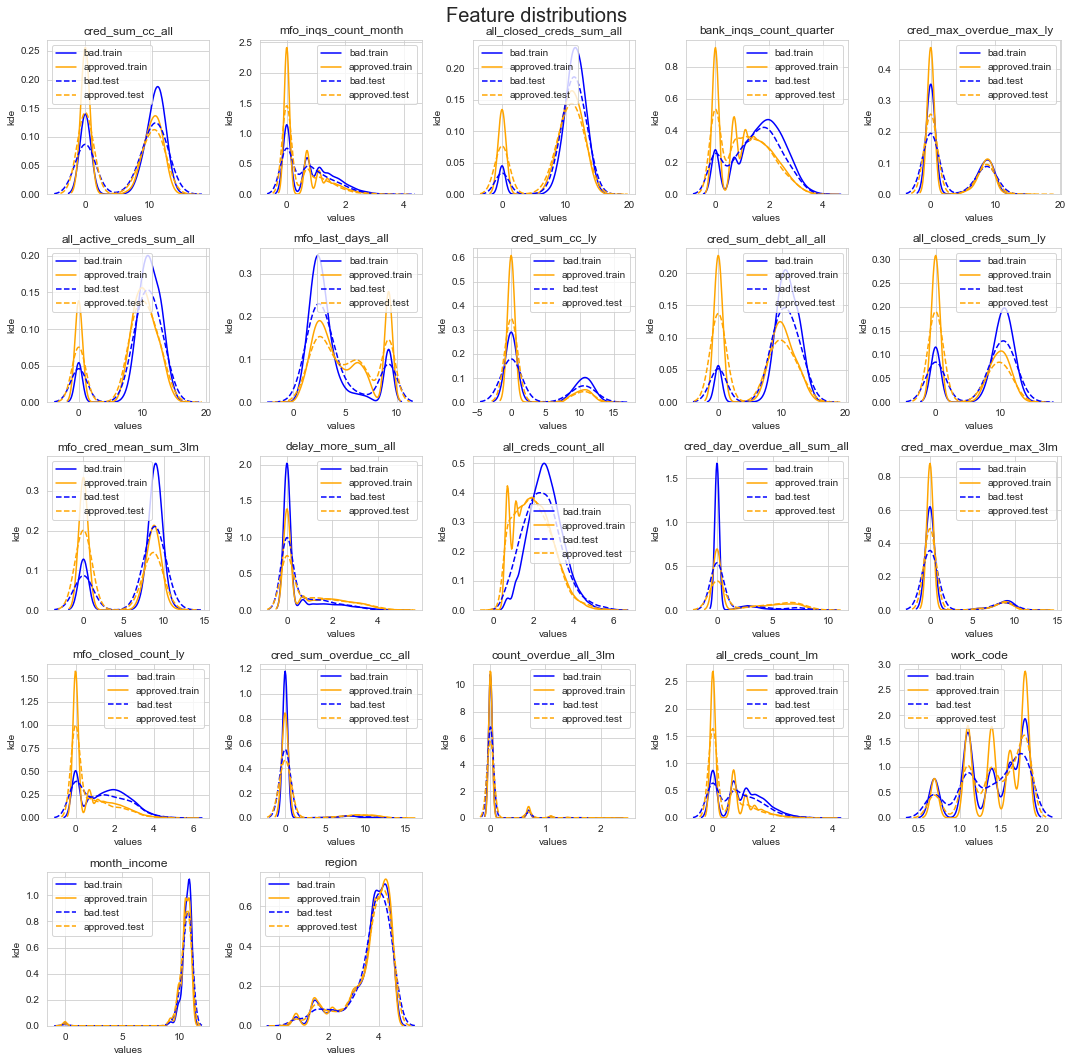

In [11]:
L_res = []
fig = plt.figure(figsize= (15, 15))
plt.suptitle('Feature distributions', fontsize = 20)
for i, feature in enumerate(L_features):
    
    f_bad_tr =  np.log1p(X_bad_tr[feature])
    f_bad_te = np.log1p(X_bad_te[feature])
    f_approved_tr = np.log1p(X_approved_tr[feature])
    f_approved_te = np.log1p(X_approved_te[feature] )   
    
    L_res.append((feature,\
                  do_ks_2samp_test(f_bad_tr, f_bad_te),\
                  do_ks_2samp_test(f_approved_tr, f_approved_te),\
                  do_ks_2samp_test(f_bad_tr, f_approved_tr),\
                  do_ks_2samp_test(f_bad_te, f_approved_te)))
    
    ax = plt.subplot(5, 5, i+1)
    sns.kdeplot(f_bad_tr,color ='blue')
    sns.kdeplot(f_approved_tr,color ='orange')
    sns.kdeplot(f_bad_te,color ='blue',linestyle ='--')    
    sns.kdeplot(f_approved_te,color ='orange',linestyle ='--')
    plt.legend(['bad.train', 'approved.train', 'bad.test', 'approved.test'])
    plt.xlabel('values')
    plt.ylabel('kde')
    plt.title(feature)
plt.subplots_adjust(hspace = .6) 
plt.tight_layout()
fig.savefig('kde_eda.png')

In [12]:
df_kstest = pd.DataFrame.from_records(L_res, columns = ['feature',\
                                            'bad.train & bad.test', 'approved.train & approved.test',
                                            'bad.train & approved.train', 'bad.test & approved.test'])

In [13]:
# print_df(df_kstest)

In [14]:
L2_res=[]
for feature in L_features:
    x1_tr = X_bad_tr[y_bad_tr==1][feature]
    x0_tr = X_bad_tr[y_bad_tr!=1][feature]
    
    x1_te = X_bad_te[y_bad_te==1][feature]
    x0_te = X_bad_te[y_bad_te!=1][feature]
    
    _x1_tr = X_approved_tr[y_approved_tr==1][feature]
    _x0_tr = X_approved_tr[y_approved_tr!=1][feature]
    
    _x1_te = X_approved_te[y_approved_te==1][feature]
    _x0_te = X_approved_te[y_approved_te!=1][feature]
    L2_res.append((feature,\
                   do_ks_2samp_test(x1_tr, x0_tr),\
                   do_ks_2samp_test(x1_te, x0_te),\
                   do_ks_2samp_test(_x1_tr, _x0_tr),\
                   do_ks_2samp_test(_x1_te, _x0_te)))

In [15]:
df_kstest2 = pd.DataFrame.from_records(L2_res, columns = ['feature', 'bad&train', 'bad&test', 'approved&train', 'approved&test'])

In [16]:
df_kstest2

,feature,bad&train,bad&test,approved&train,approved&test
0,cred_sum_cc_all,раcпределения одинаковые,раcпределения одинаковые,раcпределения разные,раcпределения разные
1,mfo_inqs_count_month,раcпределения разные,раcпределения одинаковые,раcпределения разные,раcпределения разные
2,all_closed_creds_sum_all,раcпределения разные,раcпределения одинаковые,раcпределения разные,раcпределения разные
3,bank_inqs_count_quarter,раcпределения одинаковые,раcпределения одинаковые,раcпределения разные,раcпределения разные
4,cred_max_overdue_max_ly,раcпределения разные,раcпределения одинаковые,раcпределения разные,раcпределения одинаковые
5,all_active_creds_sum_all,раcпределения одинаковые,раcпределения одинаковые,раcпределения разные,раcпределения разные
6,mfo_last_days_all,раcпределения одинаковые,раcпределения одинаковые,раcпределения разные,раcпределения разные
7,cred_sum_cc_ly,раcпределения одинаковые,раcпределения одинаковые,раcпределения разные,раcпределения разные
8,cred_sum_debt_all_all,раcпределения одинаковые,раcпределения одинаковые,раcпределения разные,раcпределения разные
9,all_closed_creds_sum_ly,раcпределения разные,раcпределения одинаковые,раcпределения разные,раcпределения разные


#### 2.1. cred_sum_cc_all(Сумма кредитов по кредитным картам)

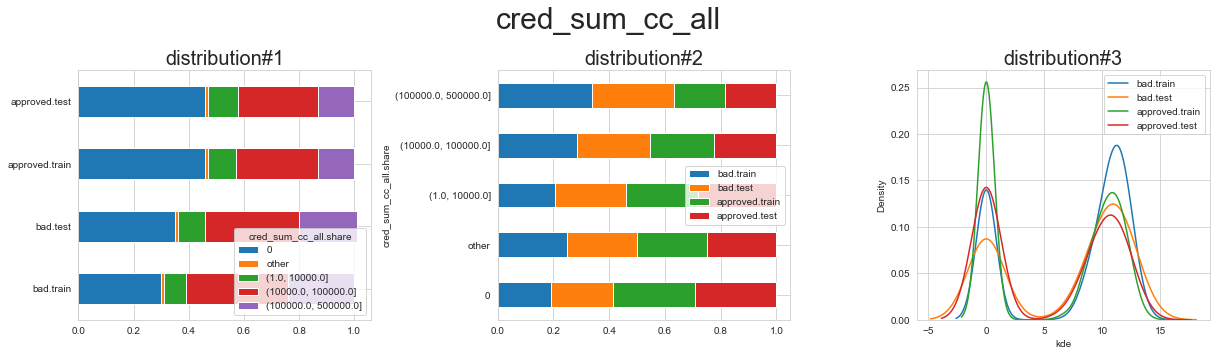

In [17]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='cred_sum_cc_all',\
            to_bin = True,\
            bins=[1, 10000, 100000, 500000])

#### 2.2. mfo_inqs_count_month(количество запросов на кредиты в другие в МФО)

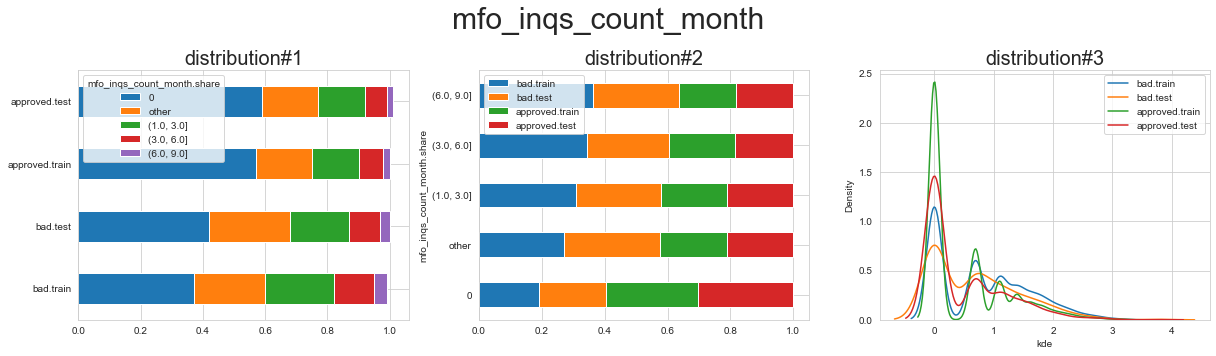

In [18]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='mfo_inqs_count_month',\
            to_bin = True,\
            bins=[1, 3, 6, 9])

#### 2.3. all_closed_creds_sum_all(количество закрытых кредитов)

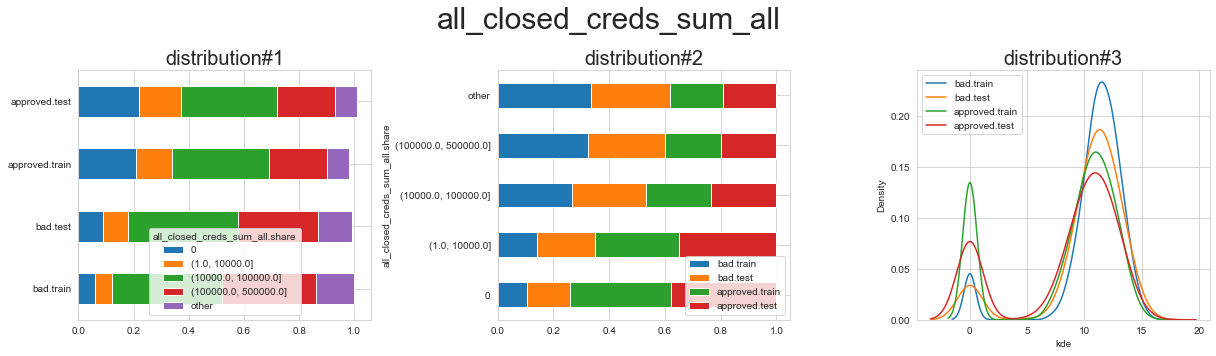

In [19]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='all_closed_creds_sum_all',\
            to_bin = True,\
            bins=[1, 10000, 100000, 500000])

#### 2.4. bank_inqs_count_quarter(максимальная просрочка за год)

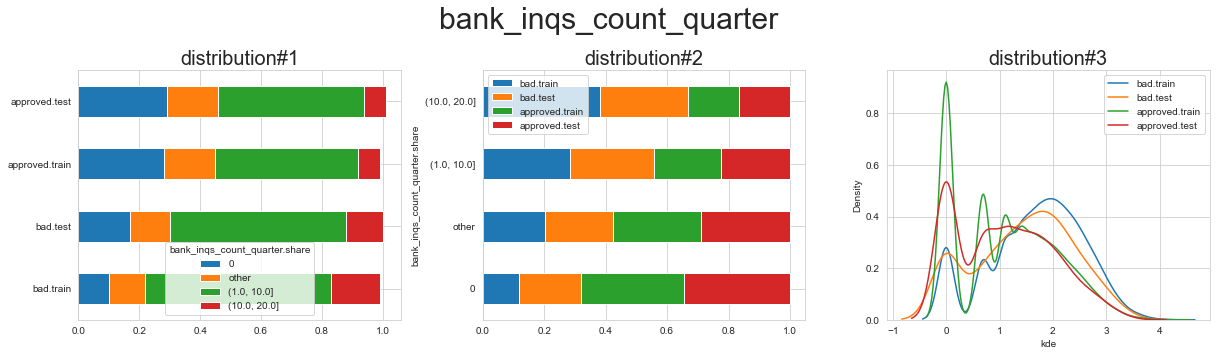

In [20]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='bank_inqs_count_quarter',\
            to_bin = True,\
            bins=[1, 10, 20])

#### 2.5. cred_max_overdue_max_ly(количество запросов на кредиты в банки)

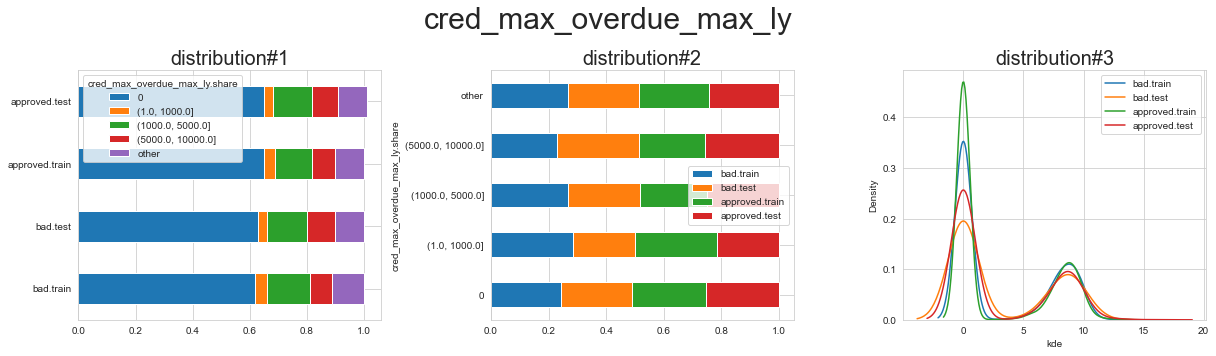

In [21]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='cred_max_overdue_max_ly',\
            to_bin = True,\
            bins=[1, 1000, 5000, 10000])

#### 2.6. all_active_creds_sum_all(денежная сумма всех активных кредитов)


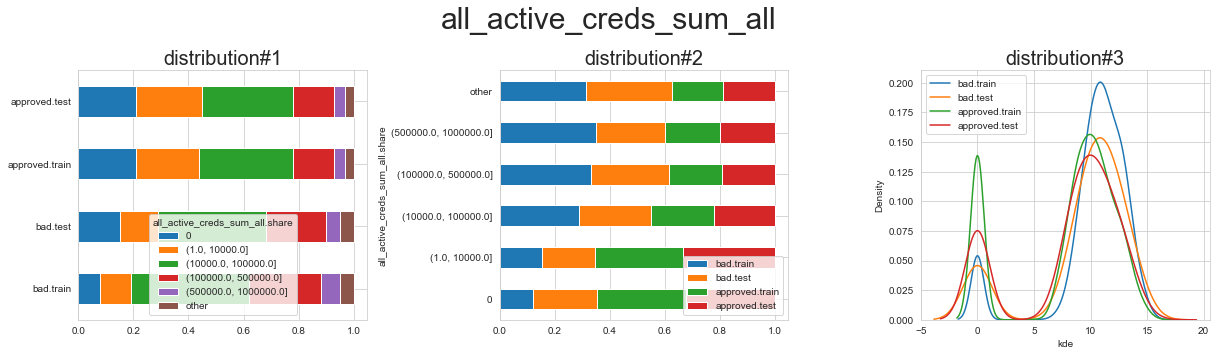

In [22]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='all_active_creds_sum_all',\
            to_bin = True,\
            bins=[1, 10000, 100000, 500000, 1000000])

#### 2.7. mfo_last_days_all(Количество дней с последнего займа в МФО)

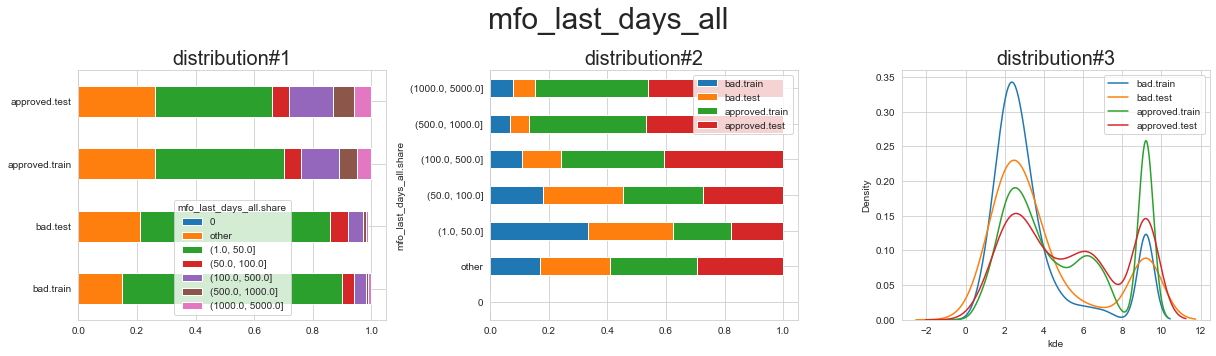

In [23]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='mfo_last_days_all',\
            to_bin = True,\
            bins=[1, 50, 100, 500, 1000, 5000])

#### 2.8. cred_sum_cc_ly(Сумма лимитов кредитных карт, оформленных за последний год)

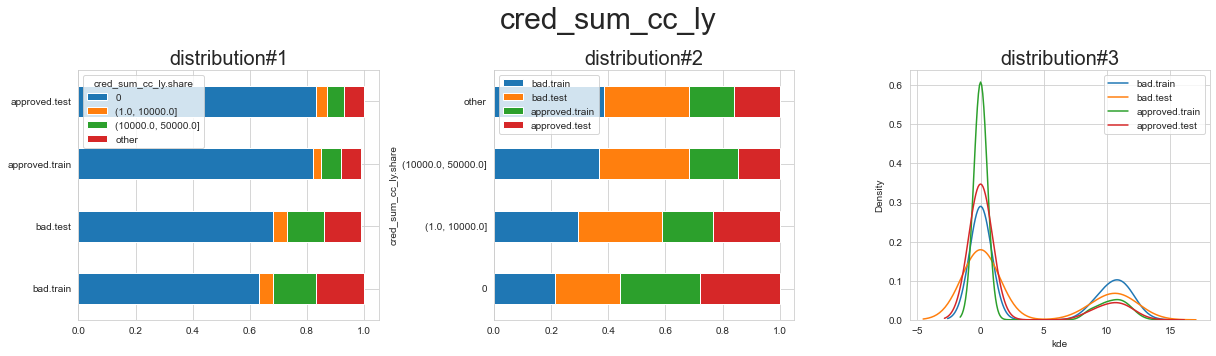

In [24]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='cred_sum_cc_ly',\
            to_bin = True,\
            bins=[1,10000, 50000])

#### 2.9. cred_sum_debt_all_all(Сумма задолженности по всем кредитам)

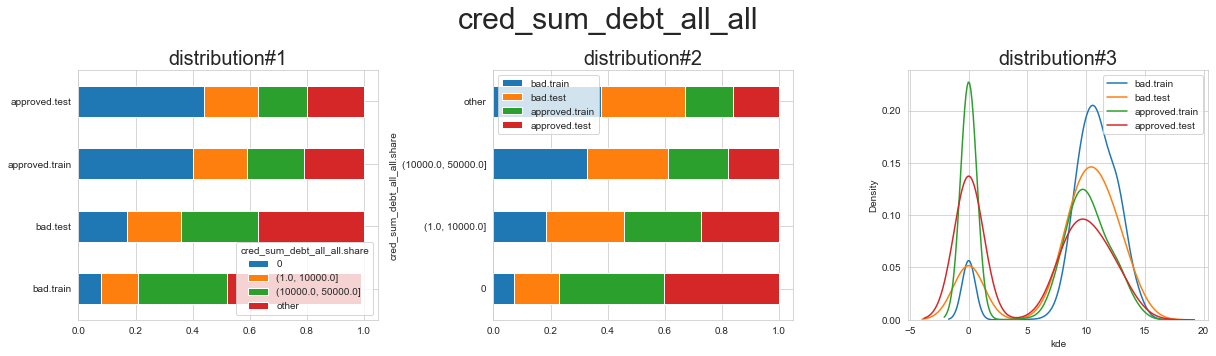

In [25]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='cred_sum_debt_all_all',\
            to_bin = True,\
            bins=[1,10000, 50000])

#### 2.10. all_closed_creds_sum_ly(Сумма закрытых кредитов за последний год)

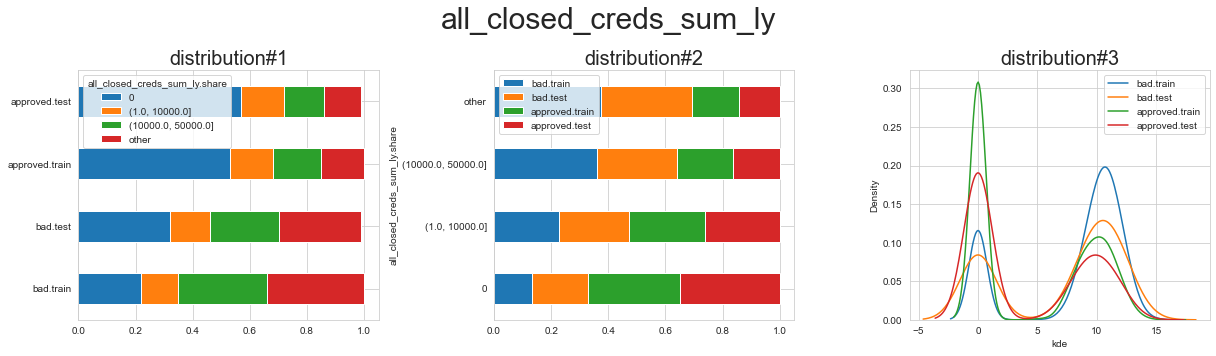

In [26]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='all_closed_creds_sum_ly',\
            to_bin = True,\
            bins=[1,10000, 50000])

#### 2.11. mfo_cred_mean_sum_3lm(Средняя сумма МФО кредитов, выданных за последние 3 месяца)

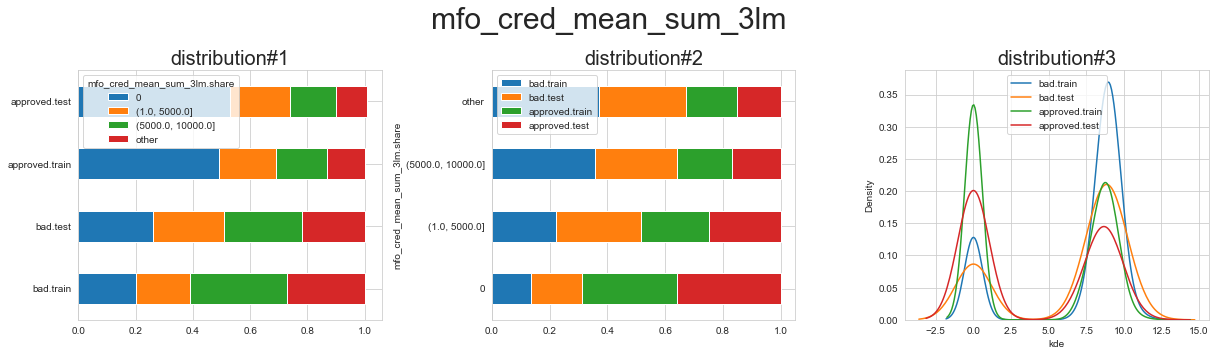

In [27]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='mfo_cred_mean_sum_3lm',\
            to_bin = True,\
            bins=[1,5000, 10000])

#### 2.12. delay_more_sum_all(Количество просрочек более чем на 90 дней по всем кредитам)

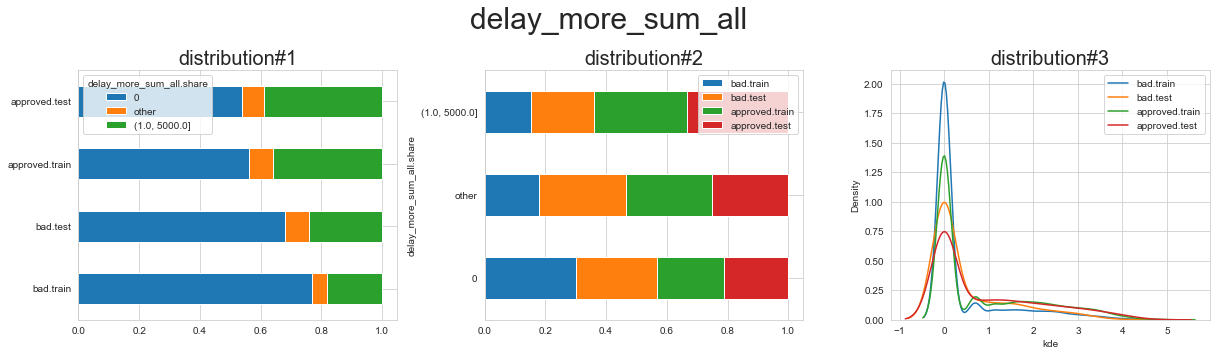

In [28]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='delay_more_sum_all',\
            to_bin = True,\
            bins=[1,5000, 10000])

#### 2.13. all_creds_count_all(Общее количество кредитов)

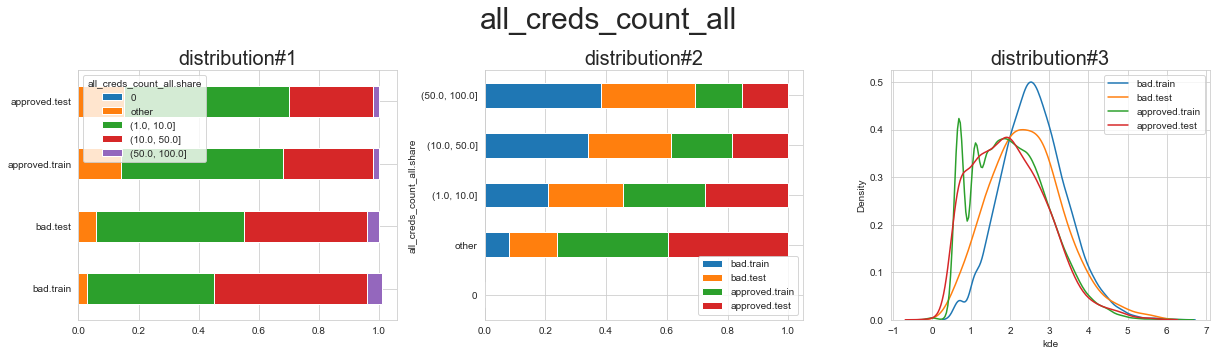

In [29]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='all_creds_count_all',\
            to_bin = True,\
            bins=[1,10, 50, 100])

#### 2.14. cred_day_overdue_all_sum_all(Суммарное количество дней просрочки текущих активных кредитов)

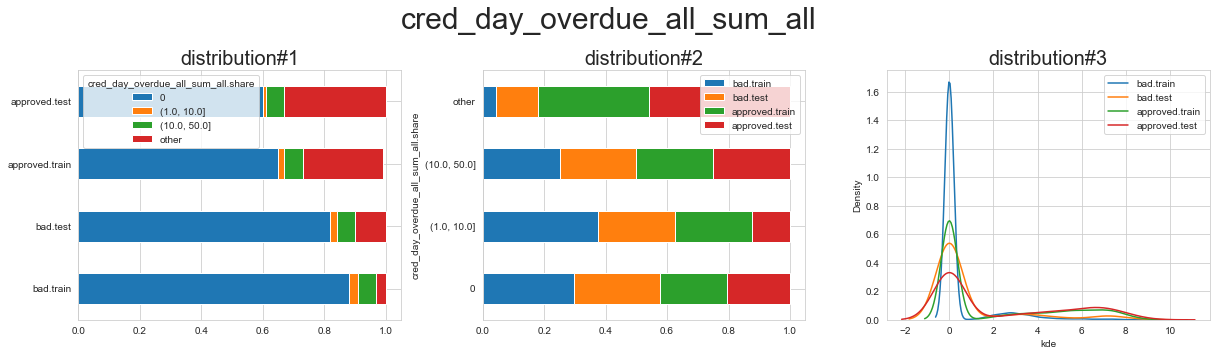

In [30]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='cred_day_overdue_all_sum_all',\
            to_bin = True,\
            bins=[1,10, 50])

#### 2.15. cred_max_overdue_max_3lm(Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца)

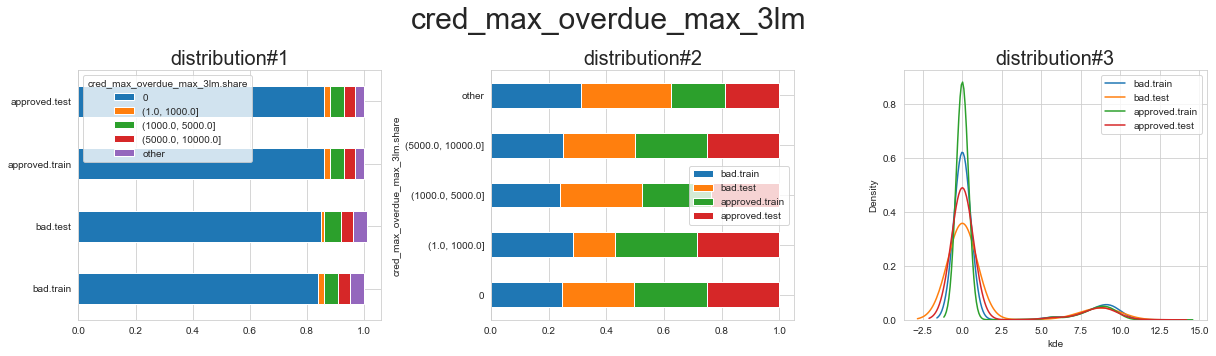

In [31]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='cred_max_overdue_max_3lm',\
            to_bin = True,\
            bins=[1, 1000, 5000, 10000])

#### 2.16. mfo_closed_count_ly(Количество закрытых МФО кредитов, взятых за последний год)

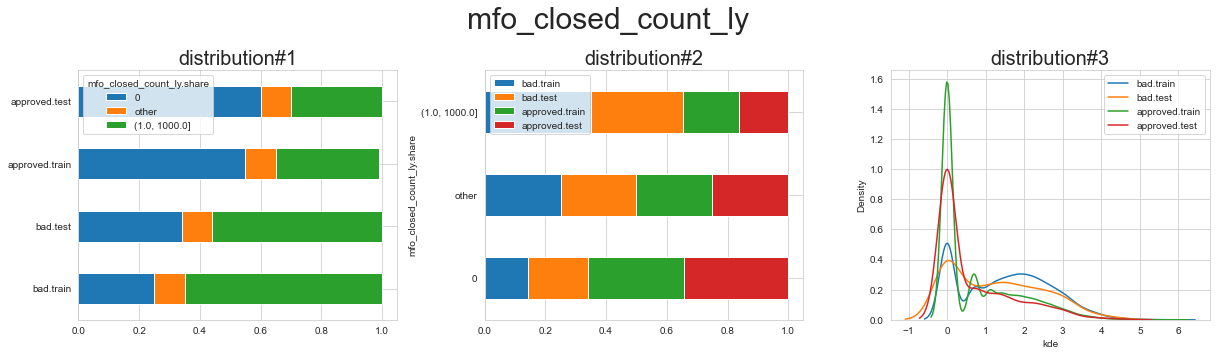

In [32]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='mfo_closed_count_ly',\
            to_bin = True,\
            bins=[1, 1000, 5000, 10000])

#### 2.17. count_overdue_all_3lm(Сумма просрочек по кредитным картам)

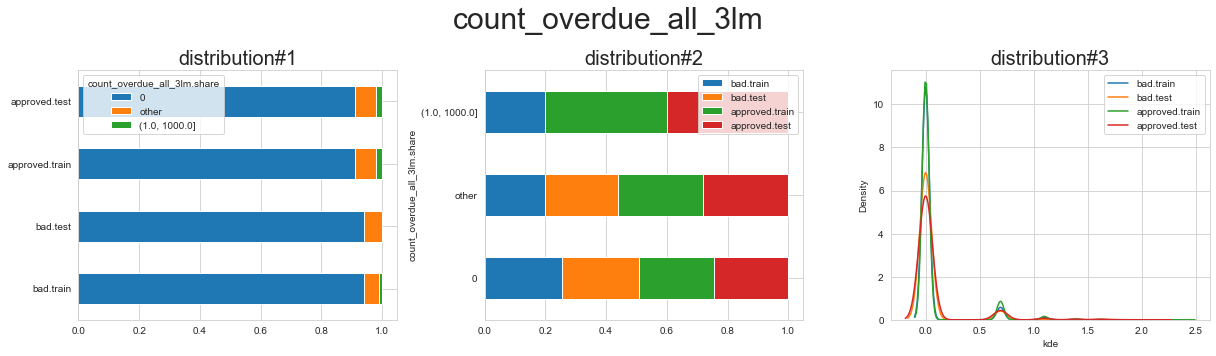

In [33]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='count_overdue_all_3lm',\
            to_bin = True,\
            bins=[1, 1000, 5000, 10000, 50000, 100000])

#### 2.18. cred_sum_overdue_cc_all(Количество кредитов на просрочке, взятых за последние 3 месяца)

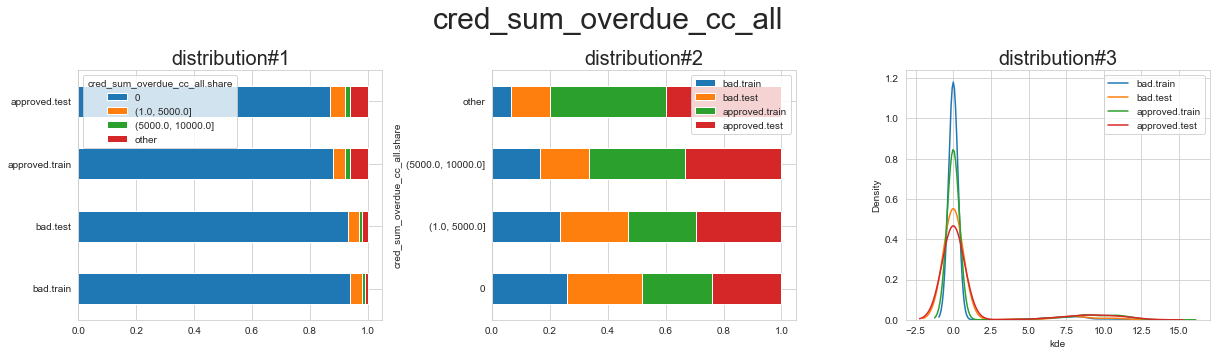

In [34]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='cred_sum_overdue_cc_all',\
            to_bin = True,\
            bins=[1, 5000, 10000])

#### 2.19. all_creds_count_lm(Количество кредитов, взятых за последний месяц)

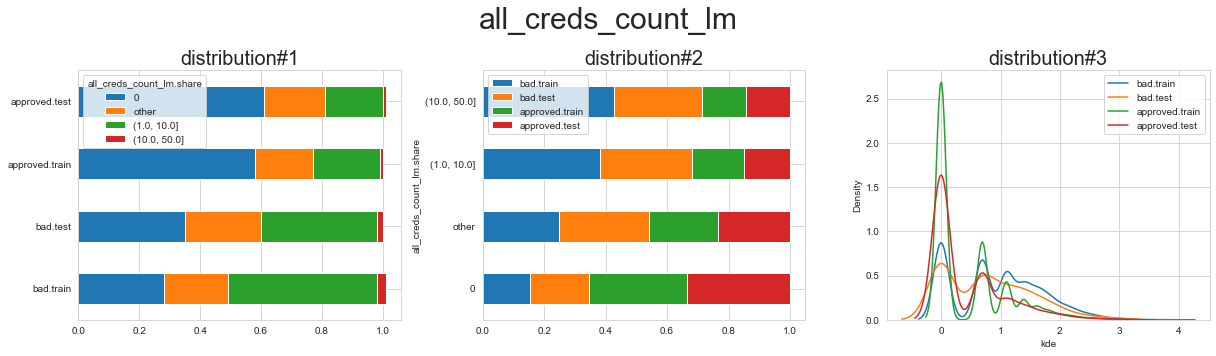

In [35]:
make_report(X_bad_tr, X_bad_te, X_approved_tr, X_approved_te,\
            feature='all_creds_count_lm',\
            to_bin = True,\
            bins=[1,10, 50])

#### 2.20. region(регион подачи заявки)

In [36]:
L= []
for name, df in zip(('bad.train', 'bad.test', 'approved.train', 'approved.test'),\
                    (X_bad_tr, X_bad_te, X_approved_tr, X_approved_te)):
    counts = df['region'].value_counts()
    shares = df['region'].value_counts(normalize = True)
    to_use = counts.head(10).index
    L.append(shares.loc[to_use].to_frame(name))
df_regions = pd.concat(L, 1).sort_index().round(4)
df_regions.index.name='region'

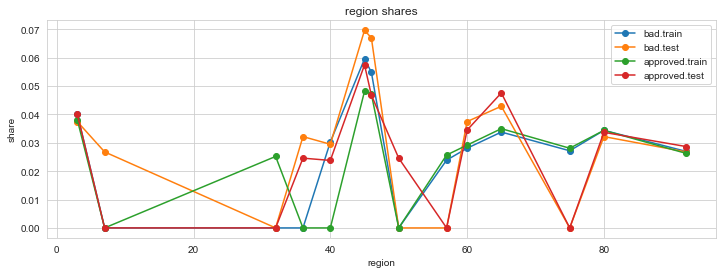

In [37]:
fig = df_regions.fillna(0).plot(marker ='o', figsize = (12, 4))
plt.title('region shares')
plt.xlabel('region')
plt.ylabel('share');


### 3. Моделирование

# Devim(отчет по тестовому заданию)

### Описание  данных

* Переменные, характеризующие кредитную историю клиента

|признак|описание|
|---|---|
|cred_sum_cc_all|сумма кредитов по кредитным картам|
|mfo_inqs_count_month|количество запросов на кредиты в другие в МФО|
|all_closed_creds_sum_all|количество закрытых кредитов|
|bank_inqs_count_quarter|количество запросов на кредиты в банки|
|cred_max_overdue_max_ly|максимальная просрочка за год|
|all_active_creds_sum_all|денежная сумма всех активных кредитов|
|mfo_last_days_all|Количество дней с последнего займа в МФО|
|cred_sum_cc_ly|Сумма лимитов кредитных карт, оформленных за последний год|
|cred_sum_debt_all_all|Сумма задолженности по всем кредитам|
|all_closed_creds_sum_ly|Сумма закрытых кредитов за последний год|
|mfo_cred_mean_sum_3lm |Средняя сумма МФО кредитов, выданных за последние 3
месяца|
|delay_more_sum_all|Количество просрочек более чем на 90 дней по всем кредитам|
|all_creds_count_all|Общее количество кредитов|
|cred_day_overdue_all_sum_all|Суммарное количество дней просрочки текущих
активных кредитов|
|cred_max_overdue_max_3lm|Максимальная сумма просроченной задолженности, по
кредитам взятым за последние 3 месяца|
|mfo_closed_count_ly|Количество закрытых МФО кредитов, взятых за последний год|
|cred_sum_overdue_cc_all|Сумма просрочек по кредитным картам|
|count_overdue_all_3lm|Количество кредитов на просрочке, взятых за последние 3
месяца|
|all_creds_count_lm|Количество кредитов, взятых за последний месяц
|region|регион подачи заявки|

* Переменные характеризующие клиента

|признак|описание|
|---|---|
|work_code|Профессия. 5 - рабочие профессии (слесарь, токарь). 3 - офисный
работник (бухгалтер, программист). 1 - госслужащий (полицейский, медсестра)|
|month_income|доход|

* Целевые переменные:
    
|признак|описание|
|---|---|
|bad|1 - кредит просрочен, 0 - кредит возвращен, nan - отказ|   
|approved|1 - одобрено, 0 - отказано|

### Постановка задачи:

Построить две модели классификации на исходных признаках.             
Модель 1 - обученная только на выданных заявках, целевая переменная bad.             
Модель 2 - обученная на всех заявках, целевая переменная approved.             
Для тренировки и валидации использовать файл train.csv             
Сравнить распределения признаков на двух выборках. Первая - только выданные             
заявки (bad != nan). Вторая - все заявки. Выделить признаки, распределения которых             
сильно отличаются. Прокомментировать причину различий в распределении.             
Сравнить модель 1 и модель 2     

### Результаты:
1. Доля подтвержденных заявок во всех поданных заявках равна 0.3
2. Доля bad = 0.27, Доля approved = 0.31
3. Каждый 3-ий кредит одобряется, из них примерно каждый 3-ий == bad          
4. Отношение размера тренировочного датасета к размеру тестового датасета равно 19    
5. В датасетах отсутствуют пропущенные значения
6. Признаки: тип и число уникальных значений    

|признак|тип|bad.train.nunique|all.train.nunique|bad.train.nunique|all.train.nunique|
|---|---|---|---|---|---|
|work_code|int32|5|5|5|5
|count_overdue_all_3lm|int32|7|11|3|11
|month_income|int32|11|18|9|18
|mfo_inqs_count_month|int32|26|26|15|26
|all_creds_count_lm|int32|32|32|17|32
|bank_inqs_count_quarter|int32|51|54|27|54
|delay_more_sum_all|int32|68|125|24|125
|region|int32|87|90|74|90
|mfo_closed_count_ly|int32|110|114|42|114
|all_creds_count_all|int32|164|181|65|181
|cred_day_overdue_all_sum_all|int32|224|2318|58|2318
|cred_sum_cc_ly|int32|397|582|69|582
|cred_sum_overdue_cc_all|int32|414|2619|27|2619
|mfo_last_days_all|int32|430|1639|89|1639
|cred_max_overdue_max_3lm|int32|536|1082|41|1082
|cred_sum_cc_all|int32|1517|3107|149|3107
|cred_max_overdue_max_ly|int32|1538|3207|101|3207
|all_closed_creds_sum_ly|int32|2974|4246|206|4246
|mfo_cred_mean_sum_3lm|int32|3044|4075|216|4075
|all_active_creds_sum_all|int32|4990|10705|283|10705
|cred_sum_debt_all_all|int32|5346|9379|278|9379
|all_closed_creds_sum_all|int32|5752|13583|317|13583

6. Первичный анализ

* Распределения
<img src='kde_eda.png'>

* Тест Колмогорова-Смиронова(идентичность распределений) 

|feature|bad.train & bad.test|approved.train & approved.test|bad.train & approved.train|bad.test & approved.test|
|---|---|---|---|---|
|cred_sum_cc_all|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|mfo_inqs_count_month|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|all_closed_creds_sum_all|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|bank_inqs_count_quarter|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_max_overdue_max_ly|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|all_active_creds_sum_all|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|mfo_last_days_all|раcпределения разные|раcпределения разные|раcпределения разные|раcпределения разные
|cred_sum_cc_ly|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_sum_debt_all_all|раcпределения разные|раcпределения разные|раcпределения разные|раcпределения разные
|all_closed_creds_sum_ly|раcпределения разные|раcпределения разные|раcпределения разные|раcпределения разные
|mfo_cred_mean_sum_3lm|раcпределения разные|раcпределения разные|раcпределения разные|раcпределения разные
|delay_more_sum_all|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|all_creds_count_all|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_day_overdue_all_sum_all|раcпределения разные|раcпределения разные|раcпределения разные|раcпределения разные
|cred_max_overdue_max_3lm|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|mfo_closed_count_ly|раcпределения разные|раcпределения разные|раcпределения разные|раcпределения разные
|cred_sum_overdue_cc_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|count_overdue_all_3lm|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|all_creds_count_lm|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|work_code|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|month_income|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|region|раcпределения одинаковые|раcпределения одинаковые|раcпределения одинаковые|раcпределения одинаковые

* Тест Колмогорова-Смиронова(идентичность распределений) для таргета==1 и таргета ==0

|feature|bad & train|bad & test|approved & train|approved & test|
|---|---|---|---|---|
|cred_sum_cc_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|mfo_inqs_count_month|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|all_closed_creds_sum_all|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|bank_inqs_count_quarter|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_max_overdue_max_ly|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|all_active_creds_sum_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|mfo_last_days_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_sum_cc_ly|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_sum_debt_all_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|all_closed_creds_sum_ly|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|mfo_cred_mean_sum_3lm|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|delay_more_sum_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|all_creds_count_all|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_day_overdue_all_sum_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_max_overdue_max_3lm|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|mfo_closed_count_ly|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|cred_sum_overdue_cc_all|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|count_overdue_all_3lm|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые
|all_creds_count_lm|раcпределения одинаковые|раcпределения одинаковые|раcпределения разные|раcпределения разные
|work_code|раcпределения разные|раcпределения разные|раcпределения разные|раcпределения разные
|month_income|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения разные
|region|раcпределения разные|раcпределения одинаковые|раcпределения разные|раcпределения одинаковые


7. Первичный анализ №2
<img src='kde_cred_sum_cc_all.png'>
<img src='kde_mfo_inqs_count_month.png'>
<img src='kde_all_closed_creds_sum_all.png'>
<img src='kde_bank_inqs_count_quarter.png'>
<img src='kde_cred_max_overdue_max_ly.png'>
<img src='kde_all_active_creds_sum_all.png'>
<img src='kde_mfo_last_days_all.png'>
<img src='kde_cred_sum_cc_ly.png'>
<img src='kde_cred_sum_debt_all_all.png'>
<img src='kde_all_closed_creds_sum_ly.png'>
<img src='kde_mfo_cred_mean_sum_3lm.png'>
<img src='kde_delay_more_sum_all.png'>
<img src='kde_all_creds_count_all.png'>
<img src='kde_cred_day_overdue_all_sum_all.png'>
<img src='kde_cred_max_overdue_max_3lm.png'>
<img src='kde_mfo_closed_count_ly.png'>
<img src='kde_count_overdue_all_3lm.png'>
<img src='kde_cred_sum_overdue_cc_all.png'>
<img src='kde_all_creds_count_lm.png'>
<img src='pp.png'>
